### VODAFONE

In [1]:
# DataFrame
import numpy as np
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Collections
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
vod_sent_df = pd.read_csv('AvgDailySent/VOD_daily_avg_sentiment.csv')
vod_sent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  484 non-null    object 
 1   target      434 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


In [3]:
vod_sent_df.head()

,created_at,target
0,2021-01-01 00:00:00+00:00,2.000000
1,2021-01-02 00:00:00+00:00,NaN
2,2021-01-03 00:00:00+00:00,NaN
3,2021-01-04 00:00:00+00:00,1.333333
4,2021-01-05 00:00:00+00:00,1.666667


In [4]:
# Convert date column to datetime.
vod_sent_df['created_at'] = pd.to_datetime(vod_sent_df['created_at']).dt.tz_localize(None)
vod_sent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  484 non-null    datetime64[ns]
 1   target      434 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.7 KB


In [5]:
# Assign target value.
vod_sent_df.loc[vod_sent_df['target'] < 1.0, 'target'] = 0.0
vod_sent_df.loc[vod_sent_df['target'] > 1.0, 'target'] = 2.0
vod_sent_df

,created_at,target
0,2021-01-01,2.0
1,2021-01-02,NaN
2,2021-01-03,NaN
3,2021-01-04,2.0
4,2021-01-05,2.0
...,...,...
479,2022-04-25,0.0
480,2022-04-26,1.0
481,2022-04-27,1.0
482,2022-04-28,1.0


Text(0.5, 1.0, 'Vodafone daily sentiment labels distribuition')

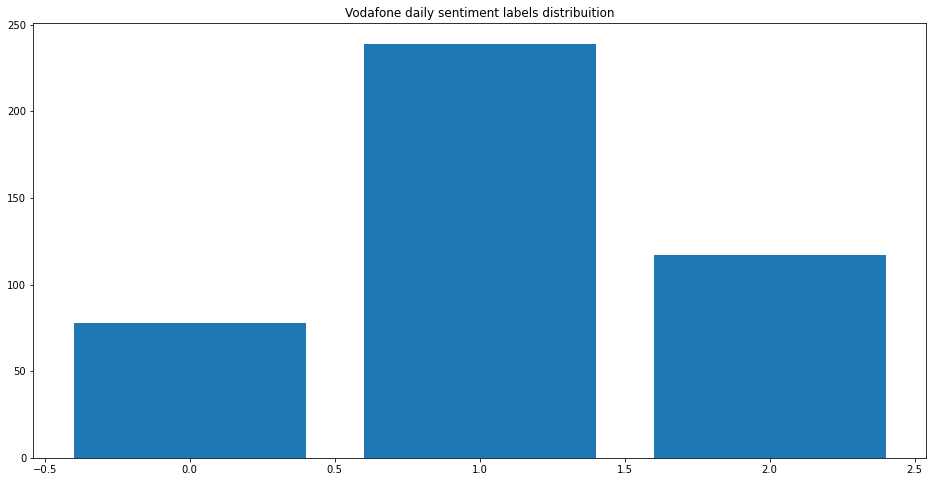

In [6]:
target_count = Counter(vod_sent_df.target)

plt.figure(figsize=(16,8))
plt.bar(target_count.keys(), target_count.values())
plt.title("Vodafone daily sentiment labels distribuition")

### Load stock data

In [7]:
vod_stock_df = pd.read_csv('StockData/VOD.L.csv')
vod_stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592


In [8]:
vod_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       335 non-null    object 
 1   Open       335 non-null    float64
 2   High       335 non-null    float64
 3   Low        335 non-null    float64
 4   Close      335 non-null    float64
 5   Adj Close  335 non-null    float64
 6   Volume     335 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 18.4+ KB


In [9]:
vod_stock_df = vod_stock_df.rename({'Date': 'created_at'}, axis=1)
vod_stock_df.head()

,created_at,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592


In [10]:
# Finetune the date such that sentiment for the previous day is assigned to the stock price of the current day.
vod_sent_df['created_at'] = vod_sent_df['created_at'] + pd.Timedelta(days=1)
vod_sent_df.head()

,created_at,target
0,2021-01-02,2.0
1,2021-01-03,NaN
2,2021-01-04,NaN
3,2021-01-05,2.0
4,2021-01-06,2.0


In [11]:
# Convert date column to datetime.
vod_stock_df['created_at'] = pd.to_datetime(vod_stock_df['created_at']).dt.tz_localize(None)

In [12]:
merged = pd.merge(vod_stock_df, vod_sent_df, on='created_at')
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,target
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549,NaN
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496,2.0
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821,2.0
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640,1.0
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592,2.0


In [13]:
merged.rename({'target': 'sentiment'}, axis=1, inplace=True)
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549,NaN
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496,2.0
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821,2.0
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640,1.0
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592,2.0


In [14]:
merged['sentiment'].value_counts()

1.0    169
2.0     83
0.0     57
Name: sentiment, dtype: int64

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(merged[['sentiment']])
merged['sentiment'] = imputer.transform(merged[['sentiment']])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  335 non-null    datetime64[ns]
 1   Open        335 non-null    float64       
 2   High        335 non-null    float64       
 3   Low         335 non-null    float64       
 4   Close       335 non-null    float64       
 5   Adj Close   335 non-null    float64       
 6   Volume      335 non-null    int64         
 7   sentiment   335 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 23.6 KB


In [17]:
merged['sentiment'].value_counts()

1.0    195
2.0     83
0.0     57
Name: sentiment, dtype: int64

In [18]:
merged['trend'] = merged['Close'] - merged['Open']
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549,1.0,1.239997
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496,2.0,0.919998
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821,2.0,2.939995
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640,1.0,-0.440002
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592,2.0,-2.959992


In [19]:
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549,1.0,1.239997
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496,2.0,0.919998
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821,2.0,2.939995
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640,1.0,-0.440002
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592,2.0,-2.959992


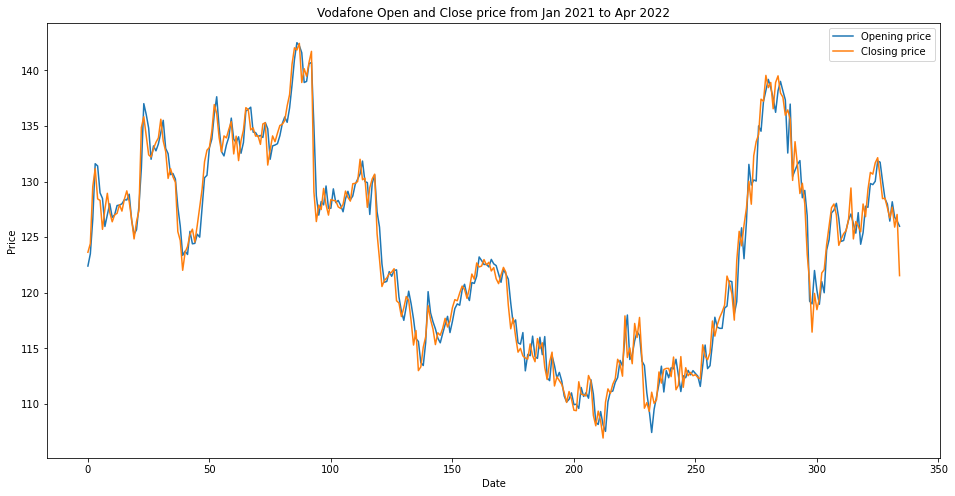

In [20]:
# Plot Opening and Closing price.
plt.figure(figsize=(16,8))
plt.plot(merged['Open'], label='Opening price')
plt.plot(merged['Close'], label='Closing price')
plt.title('Vodafone Open and Close price from Jan 2021 to Apr 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
merged.loc[merged['trend'] < 0, 'Trend'] = 'Negative'
merged.loc[merged['trend'] > 0, 'Trend'] = 'Positive'
merged.loc[merged['trend'] == 0, 'Trend'] = 'Neutral'
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,Trend
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549,1.0,1.239997,Positive
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496,2.0,0.919998,Positive
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821,2.0,2.939995,Positive
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640,1.0,-0.440002,Negative
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592,2.0,-2.959992,Negative


In [22]:
merged['Trend'].value_counts()

Positive    174
Negative    160
Neutral       1
Name: Trend, dtype: int64

Potential class imbalance.


In [23]:
merged.drop(['trend'], axis=1, inplace=True)
merged.rename({'Trend': 'trend'}, axis=1, inplace=True)
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549,1.0,Positive
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496,2.0,Positive
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821,2.0,Positive
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640,1.0,Negative
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592,2.0,Negative


In [24]:
future_trend = merged['Close'].diff(periods=5)
merged['future_trend'] = future_trend
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549,1.0,Positive,NaN
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496,2.0,Positive,NaN
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821,2.0,Positive,NaN
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640,1.0,Negative,NaN
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592,2.0,Negative,NaN
5,2021-01-11,128.979996,130.279999,120.000000,128.300003,115.042137,45473203,2.0,Negative,4.660004
6,2021-01-12,128.479996,129.005997,125.334000,125.699997,112.710800,57980802,1.0,Negative,1.279999
7,2021-01-13,125.959999,128.500000,125.699997,127.519997,114.342735,79862942,1.0,Positive,-2.019996
8,2021-01-14,127.019997,129.059998,126.360001,128.940002,115.615997,194642208,2.0,Positive,-2.220002
9,2021-01-15,128.000000,129.199997,126.099998,127.220001,114.073730,75182881,1.0,Negative,-1.220001


In [25]:
merged.loc[merged['future_trend'] < 0, 'Trend'] = 'Negative'
merged.loc[merged['future_trend'] > 0, 'Trend'] = 'Positive'
merged.loc[merged['future_trend'] == 0, 'Trend'] = 'Neutral'
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,Trend
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549,1.0,Positive,NaN,NaN
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496,2.0,Positive,NaN,NaN
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821,2.0,Positive,NaN,NaN
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640,1.0,Negative,NaN,NaN
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592,2.0,Negative,NaN,NaN
5,2021-01-11,128.979996,130.279999,120.000000,128.300003,115.042137,45473203,2.0,Negative,4.660004,Positive
6,2021-01-12,128.479996,129.005997,125.334000,125.699997,112.710800,57980802,1.0,Negative,1.279999,Positive
7,2021-01-13,125.959999,128.500000,125.699997,127.519997,114.342735,79862942,1.0,Positive,-2.019996,Negative
8,2021-01-14,127.019997,129.059998,126.360001,128.940002,115.615997,194642208,2.0,Positive,-2.220002,Negative
9,2021-01-15,128.000000,129.199997,126.099998,127.220001,114.073730,75182881,1.0,Negative,-1.220001,Negative


In [26]:
merged.drop(['future_trend'], axis=1, inplace=True)
merged.rename({'Trend': 'future_trend'}, axis=1, inplace=True)

In [27]:
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549,1.0,Positive,NaN
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496,2.0,Positive,NaN
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821,2.0,Positive,NaN
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640,1.0,Negative,NaN
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592,2.0,Negative,NaN
5,2021-01-11,128.979996,130.279999,120.000000,128.300003,115.042137,45473203,2.0,Negative,Positive
6,2021-01-12,128.479996,129.005997,125.334000,125.699997,112.710800,57980802,1.0,Negative,Positive
7,2021-01-13,125.959999,128.500000,125.699997,127.519997,114.342735,79862942,1.0,Positive,Negative
8,2021-01-14,127.019997,129.059998,126.360001,128.940002,115.615997,194642208,2.0,Positive,Negative
9,2021-01-15,128.000000,129.199997,126.099998,127.220001,114.073730,75182881,1.0,Negative,Negative


### Moving Averages

In [28]:
sma_5 = merged['Close'].rolling(5).mean().shift()
ema_5 = merged['Close'].ewm(5).mean().shift()

In [29]:
merged['sma_5'] = sma_5
merged['ema_5'] = ema_5
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5
0,2021-01-04,122.400002,127.080002,120.940002,123.639999,110.863670,65629549,1.0,Positive,NaN,NaN,NaN
1,2021-01-05,123.500000,125.199997,123.099998,124.419998,111.563072,61428496,2.0,Positive,NaN,NaN,123.639999
2,2021-01-06,126.599998,130.600006,126.239998,129.539993,116.153992,111263821,2.0,Positive,NaN,NaN,124.065453
3,2021-01-07,131.600006,131.720001,129.380005,131.160004,117.606598,132830640,1.0,Negative,NaN,NaN,126.231205
4,2021-01-08,131.399994,133.440002,127.339996,128.440002,115.167671,144800592,2.0,Negative,NaN,NaN,127.817823
5,2021-01-11,128.979996,130.279999,120.000000,128.300003,115.042137,45473203,2.0,Negative,Positive,127.439999,127.991193
6,2021-01-12,128.479996,129.005997,125.334000,125.699997,112.710800,57980802,1.0,Negative,Positive,128.372000,128.068577
7,2021-01-13,125.959999,128.500000,125.699997,127.519997,114.342735,79862942,1.0,Positive,Negative,128.628000,127.520993
8,2021-01-14,127.019997,129.059998,126.360001,128.940002,115.615997,194642208,2.0,Positive,Negative,128.224001,127.520777
9,2021-01-15,128.000000,129.199997,126.099998,127.220001,114.073730,75182881,1.0,Negative,Negative,127.780000,127.814177


In [30]:
merged.dropna(inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 5 to 334
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_at    330 non-null    datetime64[ns]
 1   Open          330 non-null    float64       
 2   High          330 non-null    float64       
 3   Low           330 non-null    float64       
 4   Close         330 non-null    float64       
 5   Adj Close     330 non-null    float64       
 6   Volume        330 non-null    int64         
 7   sentiment     330 non-null    float64       
 8   trend         330 non-null    object        
 9   future_trend  330 non-null    object        
 10  sma_5         330 non-null    float64       
 11  ema_5         330 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 33.5+ KB


In [31]:
merged.set_index('created_at', inplace=True)
merged.head(10)

,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5
created_at,,,,,,,,,,,
2021-01-11,128.979996,130.279999,120.000000,128.300003,115.042137,45473203,2.0,Negative,Positive,127.439999,127.991193
2021-01-12,128.479996,129.005997,125.334000,125.699997,112.710800,57980802,1.0,Negative,Positive,128.372000,128.068577
2021-01-13,125.959999,128.500000,125.699997,127.519997,114.342735,79862942,1.0,Positive,Negative,128.628000,127.520993
2021-01-14,127.019997,129.059998,126.360001,128.940002,115.615997,194642208,2.0,Positive,Negative,128.224001,127.520777
2021-01-15,128.000000,129.199997,126.099998,127.220001,114.073730,75182881,1.0,Negative,Negative,127.780000,127.814177
2021-01-18,126.779999,127.059998,125.660004,126.379997,113.320526,78457359,2.0,Negative,Negative,127.536000,127.696073
2021-01-19,127.000000,127.900002,125.959999,127.000000,113.876465,43730562,1.0,Neutral,Positive,127.151999,127.442615
2021-01-20,127.839996,128.179993,126.000000,127.139999,114.002007,86598519,1.0,Negative,Negative,127.411999,127.359527
2021-01-21,127.879997,128.399994,126.919998,127.919998,114.701393,60742008,1.0,Positive,Negative,127.336000,127.319167


After final data cleaning, we end up with 330 trading days of data.

Text(0.5, 1.0, 'Vodafone Closing Stock Price and Moving Averages')

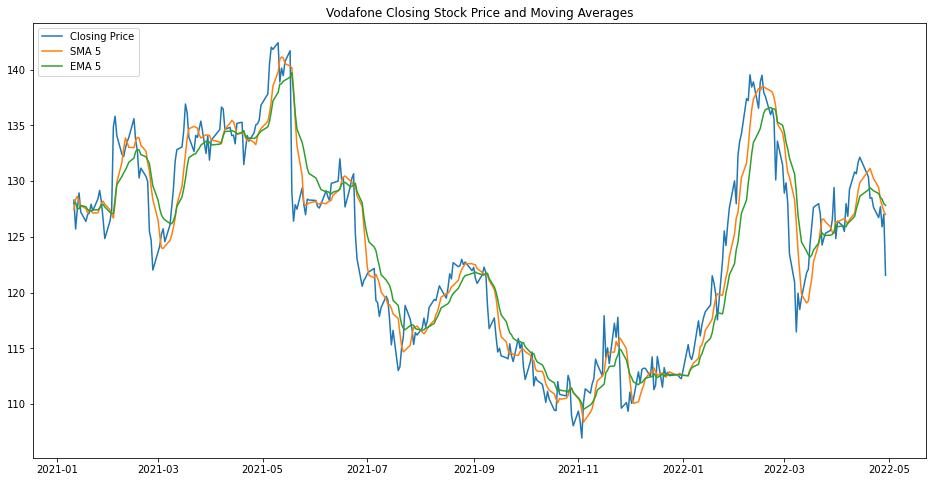

In [32]:
# Plot close price and moving averages.
plt.figure(figsize=(16,8))
plt.plot(merged['Close'], label='Closing Price')
plt.plot(merged['sma_5'], label='SMA 5')
plt.plot(merged['ema_5'], label='EMA 5')
plt.legend(loc='upper left')
plt.title('Vodafone Closing Stock Price and Moving Averages')

In [33]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2021-01-11 to 2022-04-29
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          330 non-null    float64
 1   High          330 non-null    float64
 2   Low           330 non-null    float64
 3   Close         330 non-null    float64
 4   Adj Close     330 non-null    float64
 5   Volume        330 non-null    int64  
 6   sentiment     330 non-null    float64
 7   trend         330 non-null    object 
 8   future_trend  330 non-null    object 
 9   sma_5         330 non-null    float64
 10  ema_5         330 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 30.9+ KB


### Train - Test Split

In [34]:
test_size = 110
df_train = merged[:-test_size]
df_test = merged[-test_size:]
print('There are {} training samples and {} test samples.'.format(len(df_train), len(df_test)))

There are 220 training samples and 110 test samples.


In [35]:
def get_dummies(train_set, test_set, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
    
    one_hot_encoder = OneHotEncoder(drop="if_binary", sparse=False)
    
    categorical_values = train_set[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.fit_transform(categorical_values)
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    # Trainset 
    for i, new_col_name in enumerate(new_col_names):
        train_set[new_col_name] = transformed[:,i]
    
    cat_vals = test_set[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)
    # Testset
    for i, new_col_name in enumerate(new_col_names):
        test_set[new_col_name] = transformed[:,i]
    
    return train_set, test_set

df_train, df_test = get_dummies(df_train, df_test, 'trend')

# check if the dummies are produced correctly in the trainset
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5,Neutral,Positive
created_at,,,,,,,,,,,,,
2021-01-11,128.979996,130.279999,120.000000,128.300003,115.042137,45473203,2.0,Negative,Positive,127.439999,127.991193,1.0,0.0
2021-01-12,128.479996,129.005997,125.334000,125.699997,112.710800,57980802,1.0,Negative,Positive,128.372000,128.068577,1.0,0.0
2021-01-13,125.959999,128.500000,125.699997,127.519997,114.342735,79862942,1.0,Positive,Negative,128.628000,127.520993,0.0,0.0
2021-01-14,127.019997,129.059998,126.360001,128.940002,115.615997,194642208,2.0,Positive,Negative,128.224001,127.520777,0.0,0.0
2021-01-15,128.000000,129.199997,126.099998,127.220001,114.073730,75182881,1.0,Negative,Negative,127.780000,127.814177,1.0,0.0


In [36]:
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5,Neutral,Positive
created_at,,,,,,,,,,,,,
2021-11-22,115.680000,117.540001,114.940002,117.239998,108.874718,127903907,1.0,Positive,Positive,114.652000,113.405091,0.0,0.0
2021-11-23,116.500000,117.739998,115.800003,115.980003,107.704628,85065852,2.0,Negative,Negative,115.600000,114.044242,1.0,0.0
2021-11-24,116.160004,118.379997,115.744003,117.779999,109.376183,129631623,2.0,Positive,Positive,115.212001,114.366869,0.0,0.0
2021-11-25,113.860001,114.099998,112.620003,114.099998,110.167931,60897094,0.0,Positive,Negative,115.932001,114.935724,0.0,0.0
2021-11-26,113.459999,115.080002,109.400002,109.620003,105.842323,287208951,1.0,Negative,Negative,115.744000,114.796436,1.0,0.0


In [37]:
df_train.drop(['trend'], axis=1, inplace=True)
df_test.drop(['trend'], axis=1, inplace=True)

In [34]:
# df_train.rename({'Positive': 'encoded_trend'}, axis=1, inplace=True)
# df_test.rename({'Positive': 'encoded_trend'}, axis=1, inplace=True)

### Training set scaling

In [38]:
scaler = StandardScaler()

trainset_target = df_train["future_trend"].values
trainset_predictors = df_train.drop("future_trend", axis=1)
scaled_vals = scaler.fit_transform(trainset_predictors)
df_train = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# Put non-scaled target variable back into the dataframe
df_train['future_trend'] = trainset_target

# inspect the data
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,sma_5,ema_5,Neutral,Positive,future_trend
0,0.540966,0.533677,-0.308703,0.472415,0.303286,-0.790152,1.521200,0.361462,0.421062,1.009133,-0.067574,Positive
1,0.483924,0.391995,0.300814,0.177155,-0.061336,-0.498402,-0.143795,0.469778,0.430492,1.009133,-0.067574,Positive
2,0.196438,0.335722,0.342637,0.383836,0.193899,0.012016,-0.143795,0.499530,0.363767,-0.990950,-0.067574,Negative
3,0.317365,0.398000,0.418055,0.545094,0.393038,2.689332,1.521200,0.452578,0.363740,-0.990950,-0.067574,Negative
4,0.429165,0.413570,0.388345,0.349769,0.151827,-0.097150,-0.143795,0.400976,0.399492,1.009133,-0.067574,Negative


### Testing set scaling

In [39]:
testset_target = df_test["future_trend"].values
testset_predictors = df_test.drop("future_trend", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.transform(testset_predictors)
df_test = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# Put non-scaled target variable back into the dataframe
df_test['future_trend'] = testset_target

# inspect the data
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,sma_5,ema_5,Neutral,Positive,future_trend
0,-0.976327,-0.883147,-0.886910,-0.783572,-0.661300,1.132609,-0.143795,-1.124745,-1.356314,-0.990950,-0.067574,Positive
1,-0.882780,-0.860905,-0.788637,-0.926659,-0.844302,0.133378,1.521200,-1.014570,-1.278431,1.009133,-0.067574,Negative
2,-0.921568,-0.789731,-0.795036,-0.722249,-0.582870,1.172909,1.521200,-1.059663,-1.239117,-0.990950,-0.067574,Positive
3,-1.183957,-1.265712,-1.152017,-1.140155,-0.459041,-0.430377,-1.808790,-0.975985,-1.169800,-0.990950,-0.067574,Negative
4,-1.229590,-1.156725,-1.519967,-1.648908,-1.135567,4.848524,-0.143795,-0.997834,-1.186773,1.009133,-0.067574,Negative


In [40]:
df_train.head(10)

,Open,High,Low,Close,Adj Close,Volume,sentiment,sma_5,ema_5,Neutral,Positive,future_trend
0,0.540966,0.533677,-0.308703,0.472415,0.303286,-0.790152,1.521200,0.361462,0.421062,1.009133,-0.067574,Positive
1,0.483924,0.391995,0.300814,0.177155,-0.061336,-0.498402,-0.143795,0.469778,0.430492,1.009133,-0.067574,Positive
2,0.196438,0.335722,0.342637,0.383836,0.193899,0.012016,-0.143795,0.499530,0.363767,-0.990950,-0.067574,Negative
3,0.317365,0.398000,0.418055,0.545094,0.393038,2.689332,1.521200,0.452578,0.363740,-0.990950,-0.067574,Negative
4,0.429165,0.413570,0.388345,0.349769,0.151827,-0.097150,-0.143795,0.400976,0.399492,1.009133,-0.067574,Negative
5,0.289985,0.175579,0.338067,0.254377,0.034026,-0.020770,1.521200,0.372619,0.385101,1.009133,-0.067574,Negative
6,0.315083,0.268996,0.372347,0.324785,0.120974,-0.830800,-0.143795,0.327991,0.354216,-0.990950,14.798649,Positive
7,0.410912,0.300134,0.376918,0.340683,0.140609,0.169129,-0.143795,0.358208,0.344091,1.009133,-0.067574,Negative
8,0.415475,0.324601,0.482046,0.429261,0.249993,-0.433995,-0.143795,0.349375,0.339173,-0.990950,-0.067574,Negative
9,0.429165,0.311256,0.422626,0.363395,0.168655,-0.527603,-0.143795,0.325666,0.352406,1.009133,-0.067574,Positive


In [41]:
X_train = df_train.drop('future_trend', axis=1)
y_train = df_train['future_trend'].copy()

### Baseline

In [42]:
y_train.value_counts()

Negative    113
Positive    107
Name: future_trend, dtype: int64

The baseline classifier will output "Negative" for all predictions. We will use macro-averaging in this project (precision, recall and F-score are evaluated in each class separately and then averaged across classes).

So if we apply the baseline classifier to all of the training set. 

For the "Negative" label, the accuracy measures will be:

* Precision: 113/220 = 0.514

* Recall: 117/117 = 1.0

* F-score: 2/(1/precision + 1/recall) = 0.679

For the "Positive" label, it will be:

* Precision: 0.0/0.0 = 0.0

* Recall: 0.0/103 = 0.0

* F-score: 0.0

The averages of the two classes, i.e. the eventual baseline scores:

* **Precision: 0.266**

* **Recall: 0.5**

* **F-score: 0.347**

### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
import time

rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time() - start
print(f"Took {end} seconds")

Took 120.14188599586487 seconds


In [44]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=10,
                       random_state=7)

In [45]:
grid_search.best_score_

0.6363636363636364

In [46]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
8,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 10}",0.903535,0.636364,29.569592
17,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}",0.994949,0.622727,37.411168
16,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 10}",0.974747,0.622727,36.113990
21,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}",0.977778,0.618182,36.776860
13,"{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}",0.919697,0.613636,33.278418
18,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}",0.993434,0.613636,38.230808
9,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}",0.926768,0.613636,33.787466
15,"{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 1000}",0.924242,0.609091,34.098361
19,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 1000}",0.992424,0.609091,38.625954
11,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 1000}",0.930808,0.609091,34.563212


In [47]:
feature_importances = grid_search.best_estimator_.feature_importances_

for k, v in sorted(zip(feature_importances, X_train.columns), reverse=True):
    print(f"{v}: {k}")

ema_5: 0.18582741567200972
Close: 0.17098659018503076
Low: 0.16110887790035117
sma_5: 0.13236614014888776
Open: 0.10839804922515275
High: 0.09136600422283815
Volume: 0.05793618385342889
Adj Close: 0.049638725234280555
Neutral: 0.0423720135580203
sentiment: 0.0
Positive: 0.0


In [48]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/vod-rf-clf.joblib')

['models/vod-rf-clf.joblib']

### Support Vector Classifier with RBF kernel.

In [49]:
from sklearn.svm import SVC

svm = SVC(random_state=7, kernel='rbf')

# specify the hyperparameters and their values
# 5 x 3 = 15 combinations in the grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ["scale", "auto", 0.1],
}

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time() - start
print(f"Took {end} seconds")

Took 13.680295944213867 seconds


In [50]:
grid_search.best_score_

0.7681818181818182

In [51]:
grid_search.best_estimator_

SVC(C=100, gamma=0.1, random_state=7)

In [52]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
14,"{'C': 100, 'gamma': 0.1}",0.962121,0.768182,2.015748e+01
12,"{'C': 100, 'gamma': 'scale'}",0.959596,0.759091,2.089474e+01
13,"{'C': 100, 'gamma': 'auto'}",0.956566,0.759091,2.064414e+01
11,"{'C': 10, 'gamma': 0.1}",0.908586,0.731818,1.945525e+01
10,"{'C': 10, 'gamma': 'auto'}",0.901515,0.727273,1.932773e+01
9,"{'C': 10, 'gamma': 'scale'}",0.904040,0.718182,2.055866e+01
6,"{'C': 1, 'gamma': 'scale'}",0.759596,0.640909,1.562500e+01
7,"{'C': 1, 'gamma': 'auto'}",0.761616,0.631818,1.704244e+01
8,"{'C': 1, 'gamma': 0.1}",0.761616,0.631818,1.704244e+01
3,"{'C': 0.1, 'gamma': 'scale'}",0.567172,0.513636,9.439003e+00


In [53]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/vod-svm-rbf-clf.joblib')

['models/vod-svm-rbf-clf.joblib']

In [54]:
from joblib import load
best_svm = load("models/vod-svm-rbf-clf.joblib")
best_rf = load("models/vod-rf-clf.joblib")

In [55]:
X_test = df_test.drop("future_trend", axis=1)
y_test = df_test["future_trend"].copy()

In [56]:
ypred = best_svm.predict(X_test)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, ypred, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.5042735042735043
Recall: 0.46305084745762715
F score: 0.45405471721261187


In [57]:
accuracy_score(y_test, ypred)

0.7090909090909091

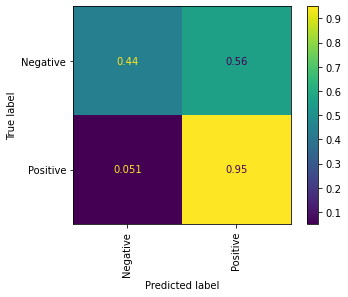

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, ypred, labels=best_svm.classes_, 
                                        xticks_rotation="vertical", normalize="true")

In [59]:
rf_ypred = best_rf.predict(X_test)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, rf_ypred, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.49357841404500996
Recall: 0.48915254237288136
F score: 0.4875228937728937


In [60]:
accuracy_score(y_test, rf_ypred)

0.7363636363636363

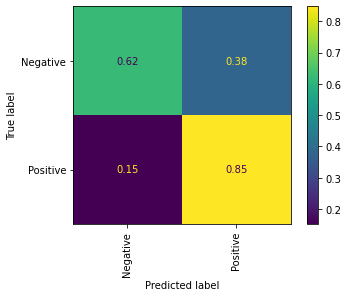

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_ypred, labels=best_rf.classes_,
                                        xticks_rotation="vertical", normalize="true")

### TSA

In [62]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [63]:
def stationary_plot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

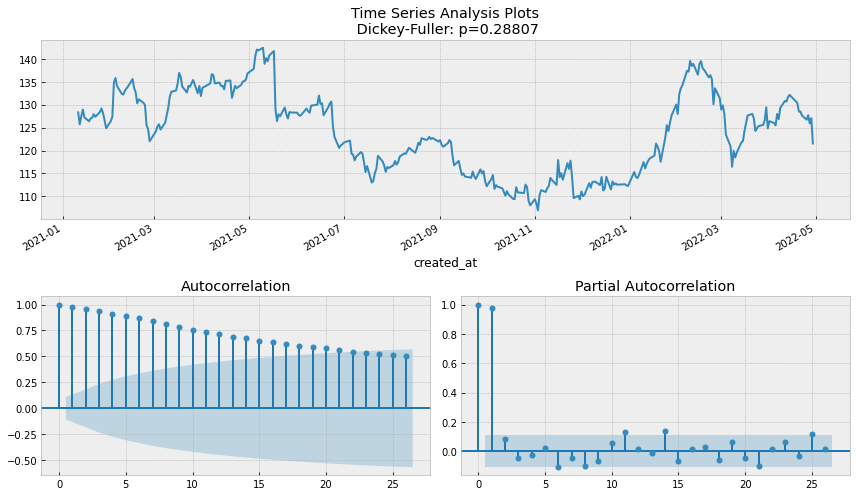

In [64]:
stationary_plot(merged["Close"])

### Testing without sentiment Variable.

In [65]:
stock_data_only = merged.drop(['sentiment'], axis=1)
stock_data_only.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5
created_at,,,,,,,,,,
2021-01-11,128.979996,130.279999,120.000000,128.300003,115.042137,45473203,Negative,Positive,127.439999,127.991193
2021-01-12,128.479996,129.005997,125.334000,125.699997,112.710800,57980802,Negative,Positive,128.372000,128.068577
2021-01-13,125.959999,128.500000,125.699997,127.519997,114.342735,79862942,Positive,Negative,128.628000,127.520993
2021-01-14,127.019997,129.059998,126.360001,128.940002,115.615997,194642208,Positive,Negative,128.224001,127.520777
2021-01-15,128.000000,129.199997,126.099998,127.220001,114.073730,75182881,Negative,Negative,127.780000,127.814177


In [66]:
training_set = stock_data_only[:-test_size]
testing_set = stock_data_only[-test_size:]
print('There are {} training samples and {} test samples.'.format(len(df_train), len(df_test)))

There are 220 training samples and 110 test samples.


In [67]:
training_set.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5
created_at,,,,,,,,,,
2021-01-11,128.979996,130.279999,120.000000,128.300003,115.042137,45473203,Negative,Positive,127.439999,127.991193
2021-01-12,128.479996,129.005997,125.334000,125.699997,112.710800,57980802,Negative,Positive,128.372000,128.068577
2021-01-13,125.959999,128.500000,125.699997,127.519997,114.342735,79862942,Positive,Negative,128.628000,127.520993
2021-01-14,127.019997,129.059998,126.360001,128.940002,115.615997,194642208,Positive,Negative,128.224001,127.520777
2021-01-15,128.000000,129.199997,126.099998,127.220001,114.073730,75182881,Negative,Negative,127.780000,127.814177


In [68]:
train_set, test_set = get_dummies(training_set, testing_set, 'trend')

In [69]:
test_set.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5,Neutral,Positive
created_at,,,,,,,,,,,,
2021-11-22,115.680000,117.540001,114.940002,117.239998,108.874718,127903907,Positive,Positive,114.652000,113.405091,0.0,0.0
2021-11-23,116.500000,117.739998,115.800003,115.980003,107.704628,85065852,Negative,Negative,115.600000,114.044242,1.0,0.0
2021-11-24,116.160004,118.379997,115.744003,117.779999,109.376183,129631623,Positive,Positive,115.212001,114.366869,0.0,0.0
2021-11-25,113.860001,114.099998,112.620003,114.099998,110.167931,60897094,Positive,Negative,115.932001,114.935724,0.0,0.0
2021-11-26,113.459999,115.080002,109.400002,109.620003,105.842323,287208951,Negative,Negative,115.744000,114.796436,1.0,0.0


In [70]:
train_set.drop(['trend'], axis=1, inplace=True)
test_set.drop(['trend'], axis=1, inplace=True)

In [107]:
# train_set.rename({'Positive': 'encoded_trend'}, axis=1, inplace=True)
# test_set.rename({'Positive': 'encoded_trend'}, axis=1, inplace=True)

In [71]:
train_set.head()    

,Open,High,Low,Close,Adj Close,Volume,future_trend,sma_5,ema_5,Neutral,Positive
created_at,,,,,,,,,,,
2021-01-11,128.979996,130.279999,120.000000,128.300003,115.042137,45473203,Positive,127.439999,127.991193,1.0,0.0
2021-01-12,128.479996,129.005997,125.334000,125.699997,112.710800,57980802,Positive,128.372000,128.068577,1.0,0.0
2021-01-13,125.959999,128.500000,125.699997,127.519997,114.342735,79862942,Negative,128.628000,127.520993,0.0,0.0
2021-01-14,127.019997,129.059998,126.360001,128.940002,115.615997,194642208,Negative,128.224001,127.520777,0.0,0.0
2021-01-15,128.000000,129.199997,126.099998,127.220001,114.073730,75182881,Negative,127.780000,127.814177,1.0,0.0


In [72]:
training_target = train_set["future_trend"].values
training_predictors = train_set.drop("future_trend", axis=1)
scaled_vals = scaler.fit_transform(training_predictors)
train_set = pd.DataFrame(scaled_vals, columns=training_predictors.columns)

# Put non-scaled target variable back into the dataframe
train_set['future_trend'] = trainset_target

# inspect the data
train_set.head()

,Open,High,Low,Close,Adj Close,Volume,sma_5,ema_5,Neutral,Positive,future_trend
0,0.540966,0.533677,-0.308703,0.472415,0.303286,-0.790152,0.361462,0.421062,1.009133,-0.067574,Positive
1,0.483924,0.391995,0.300814,0.177155,-0.061336,-0.498402,0.469778,0.430492,1.009133,-0.067574,Positive
2,0.196438,0.335722,0.342637,0.383836,0.193899,0.012016,0.499530,0.363767,-0.990950,-0.067574,Negative
3,0.317365,0.398000,0.418055,0.545094,0.393038,2.689332,0.452578,0.363740,-0.990950,-0.067574,Negative
4,0.429165,0.413570,0.388345,0.349769,0.151827,-0.097150,0.400976,0.399492,1.009133,-0.067574,Negative


In [73]:
testing_target = test_set["future_trend"].values
testing_predictors = test_set.drop("future_trend", axis=1)
scaled_vals = scaler.fit_transform(testing_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testing_predictors.columns)

# Put non-scaled target variable back into the dataframe
test_set['future_trend'] = testing_target

# inspect the data
test_set.head()

,Open,High,Low,Close,Adj Close,Volume,sma_5,ema_5,Neutral,Positive,future_trend
0,-0.869653,-0.817740,-0.814640,-0.706462,-1.199068,-0.048908,-0.984193,-1.139737,-0.896258,0.0,Positive
1,-0.773236,-0.794570,-0.712592,-0.853752,-1.338776,-0.451659,-0.872412,-1.060119,1.115750,0.0,Negative
2,-0.813213,-0.720424,-0.719237,-0.643338,-1.139193,-0.032664,-0.918162,-1.019929,-0.896258,0.0,Positive
3,-1.083651,-1.216275,-1.089933,-1.073519,-1.044659,-0.678886,-0.833265,-0.949068,-0.896258,0.0,Negative
4,-1.130684,-1.102739,-1.472020,-1.597218,-1.561135,1.448831,-0.855433,-0.966419,1.115750,0.0,Negative


In [74]:
Xtrain = train_set.drop('future_trend', axis=1)
ytrain = train_set['future_trend'].copy()

### Random Forest Classifier

In [75]:
### Random Forest Classifier

rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 118.48712873458862 seconds


In [76]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, random_state=7)

In [77]:
grid_search.best_score_

0.6363636363636364

In [78]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)
feature_importances = grid_search.best_estimator_.feature_importances_

In [79]:
for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

ema_5: 0.19553574629221046
sma_5: 0.13571948723770716
High: 0.11654505913147822
Close: 0.11314923774987838
Open: 0.10911679488235233
Volume: 0.10720391673333748
Adj Close: 0.10400129742241561
Low: 0.08898151662131389
Neutral: 0.029125552401703846
Positive: 0.0006213915276026835


In [80]:
# Save Models
if not os.path.exists("test_models"):
    os.makedirs("test_models")
    
dump(grid_search.best_estimator_, 'test_models/vod-rftest-clf.joblib')

['test_models/vod-rftest-clf.joblib']

### Support Vector Classifier with RBF kernel.

In [81]:
svc = SVC(random_state=7, kernel='rbf')

# specify the hyperparameters and their values
# 5 x 3 = 15 combinations in the grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ["scale", "auto", 0.1],
}

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 6.670576095581055 seconds


In [82]:
grid_search.best_estimator_

SVC(C=10, gamma='auto', random_state=7)

In [83]:
grid_search.best_score_

0.7363636363636364

In [84]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
10,"{'C': 10, 'gamma': 'auto'}",0.884343,0.736364,1.673330e+01
11,"{'C': 10, 'gamma': 0.1}",0.884343,0.736364,1.673330e+01
9,"{'C': 10, 'gamma': 'scale'}",0.884848,0.731818,1.729452e+01
12,"{'C': 100, 'gamma': 'scale'}",0.916162,0.722727,2.111356e+01
13,"{'C': 100, 'gamma': 'auto'}",0.913636,0.718182,2.139303e+01
14,"{'C': 100, 'gamma': 0.1}",0.913636,0.718182,2.139303e+01
6,"{'C': 1, 'gamma': 'scale'}",0.767172,0.627273,1.823568e+01
7,"{'C': 1, 'gamma': 'auto'}",0.765657,0.627273,1.807388e+01
8,"{'C': 1, 'gamma': 0.1}",0.765657,0.627273,1.807388e+01
3,"{'C': 0.1, 'gamma': 'scale'}",0.554040,0.531818,4.010939e+00


In [85]:
# Save Model
if not os.path.exists("test_models"):
    os.makedirs("test_models")
    
dump(grid_search.best_estimator_, 'test_models/vod-svctest-rbf-clf.joblib')

['test_models/vod-svctest-rbf-clf.joblib']

### Testing the models.

In [87]:
best_svc_test = load("test_models/vod-svctest-rbf-clf.joblib")
best_rf_test = load("test_models/vod-rftest-clf.joblib")

In [88]:
Xtest = test_set.drop('future_trend', axis=1)
ytest = test_set['future_trend'].copy()

In [89]:
predicted = best_svc_test.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, predicted, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.5565870910698497
Recall: 0.5624858757062147
F score: 0.5594100888218535


In [90]:
accuracy_score(ytest, predicted)

0.8363636363636363

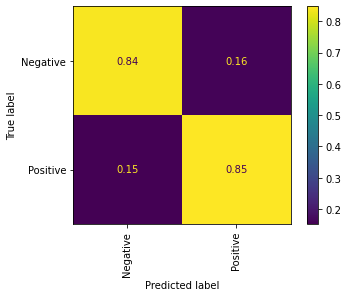

In [91]:
ConfusionMatrixDisplay.from_predictions(ytest, predicted, labels=best_svc_test.classes_, 
                                        xticks_rotation="vertical", normalize="true")

In [92]:
rf_predicted = best_rf_test.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, rf_predicted, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.4939625567741221
Recall: 0.4983050847457628
F score: 0.493133166527662


In [93]:
accuracy_score(ytest, rf_predicted)

0.7363636363636363

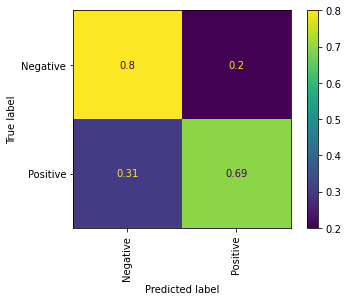

In [94]:
ConfusionMatrixDisplay.from_predictions(ytest, rf_predicted, labels=best_rf_test.classes_, 
                                        xticks_rotation="vertical", normalize="true")